In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
importlib.reload(kgs)
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()
import lap_batch
lap_batch._ensure_initialized()


local
local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 9.254 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas 

In [2]:
%load_ext pyinstrument

In [3]:

import pack_ga3
import time
import pack_runner
import lap_batch
runner = pack_runner.baseline_runner()
runner.base_ga.ga.do_legalize = False
runner.base_ga.ga.ga_base.do_legalize = False
runner.base_ga.ga.ga_base.N_trees_to_do = 156
runner.base_ga.n_generations = 5


Processing class: LAPConfig
  Added method: LAPConfig.__init__
Added function: _ensure_initialized
Added function: compute_diversity_shortcut_kernel
Added function: solve_lap_batch
{'seed': 0, 'use_fixed_h_for_size_setup': True, 'always_allow_mate_with_better': False, 'allow_reset_ratio': 0.5547846749285816, 'diversity_reset_threshold': 0.1222126749086773, 'mate_distance': 4, 'generate_extra': 0.20826381776426456, 'genotype_at': 1, 'remove_fine_1': False, 'remove_fine_2': False, 'reduce_h_threshold': 3.283175598000681e-07, 'reduce_h_amount': 0.0005910718686913338, 'reduce_h_per_individual': False, 'population_size': 1.05331788788359, 'prob_mate_own': 0.7917986243935994, 'survival_rate': 0.11348999931723383, 'elitism_fraction': 0.3805217271363305, 'search_depth': 0.9079267770607661, 'diversity_criterion': 0.10054770003402963, 'alter_diversity': 1}


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.339005, 1.836485]]
Generation 1: Best costs = [[0.339005, 0.926429]]
Generation 2: Best costs = [[0.339005, 0.626902]]
Generation 3: Best costs = [[0.339005, 0.521282]]
Generation 4: Best costs = [[0.339005, 0.478544]]
Runtime: 82.0s
Elapsed time: 81.97876691818237


_     ._   __/__   _ _  _  _ _/_   Recorded: 10:31:26  Samples:  15207
 /_//_/// /_\ / //_// / //_'/ //     Duration: 81.981    CPU time: 82.245
/   _/                      v5.1.1

Cell [5]

80.775 <module>  /tmp/ipykernel_34059/3958902788.py:1
`- 80.774 Runner.run  pack_runner.py:29
   `- 80.712 Orchestrator.run  pack_ga3.py:1321
      |- 70.665 Orchestrator._relax  pack_ga3.py:1277
      |  |- 68.877 run_simulation_list  pack_dynamics.py:633
      |  |  `- 68.859 OptimizerBFGS.run_simulation  pack_dynamics.py:42
      |  |     `- 68.788 lbfgs  lbfgs_torch_parallel.py:382
      |  |        |- 63.626 f_torch  pack_dynamics.py:68
      |  |        |  `- 62.809 Device.synchronize  <built-in>
      |  |        `- 4.380 [self]  lbfgs_torch_parallel.py
      |  `- 1.669 ndarray.get  <built-in>
      |- 4.874 GAMultiRing.apply_selection  pack_ga3.py:373
      |  `- 4.874 GAMultiRing._apply_selection  pack_ga3.py:552
      |     `- 4.873 GASinglePopulationOld.apply_selection  pack_ga3.py:373
      |        `- 4.871 GASinglePopulationOld._apply_selection  pack_ga3.py:998
      |           `- 3.835 compute_genetic_diversity  kaggle_support.py:1225
      |              `- 3.790 compute_genetic_diversity_matrix  kaggle_support.py:1078
      |                 `- 3.764 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
      |                    `- 2.376 compute_diversity_shortcut_kernel  lap_batch.py:608
      |                       |- 1.268 Device.synchronize  <built-in>
      |                       `- 0.847 [self]  lap_batch.py
      |- 3.901 GAMultiRing.generate_offspring  pack_ga3.py:332
      |  `- 3.901 GAMultiRing._generate_offspring  pack_ga3.py:621
      |     `- 3.862 GASinglePopulationOld.generate_offspring  pack_ga3.py:332
      |        `- 3.701 GASinglePopulationOld._generate_offspring  pack_ga3.py:1111
      |           `- 3.482 MoveSelector.do_move_vec  pack_move.py:42
      |              `- 3.479 MoveSelector._do_move_vec  pack_move.py:83
      |                 `- 2.701 Crossover.do_move_vec  pack_move.py:42
      `- 0.853 GAMultiRing.score  pack_ga3.py:288
         `- 0.853 GAMultiRing._score  pack_ga3.py:478
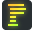

In [4]:
%%pyinstrument
kgs.profiling=True
kgs.enable_module_profiling(lap_batch)
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [5]:
kgs.print_module_profile()


Timer unit: 1e-09 s

Total time: 0.0212274 s
File: /mnt/d/packing/code/analysis/../core/lap_batch.py
Function: _ensure_initialized at line 398

Line #      Hits         Time  Per Hit   % Time  Line Contents
   398                                           def _ensure_initialized() -> None:
   399                                               """Lazy initialization hook.
   400                                               
   401                                               On first call, this:
   402                                               - Persists the CUDA source to a .cu file for profiler correlation.
   403                                               - Compiles the CUDA source with nvcc using optimized flags.
   404                                               - Loads the compiled CUBIN and extracts kernel functions.
   405                                               
   406                                               Subsequent calls are no-ops, so you can safely c